A mass of abnormal tissue is known as a tumor. There are two types of tumors: benign, which are non-cancerous and malignant, which are cancerous.

<h1> Data Analysis of the Wisconsin Breast Cancer dataset </h1>

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("wisc_bc_data.csv")

In [3]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
dataset.shape

(569, 32)

In [5]:
dataset.info() # provide all necessary information about the breast cancer dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [6]:
dataset.groupby('diagnosis').size() # return an int representing the number of elements in an object

diagnosis
B    357
M    212
dtype: int64

In [7]:
# pd.value_counts(dataset['diagnosis']).index

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

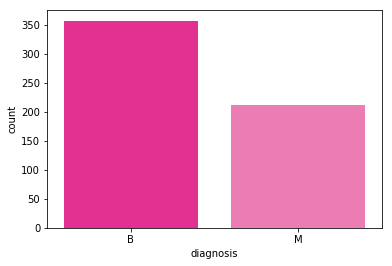

In [9]:
sns.countplot(dataset['diagnosis'], label = "Count", palette = sns.color_palette(['#FF1493', '#FF69B4']), 
              order = pd.value_counts(dataset['diagnosis']).index)
plt.show()

In [10]:
drop_id_dataset = dataset.drop("id", axis = 1)

In [11]:
bc_corr = drop_id_dataset.corr() # correlation between all features

In [12]:
bc_corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


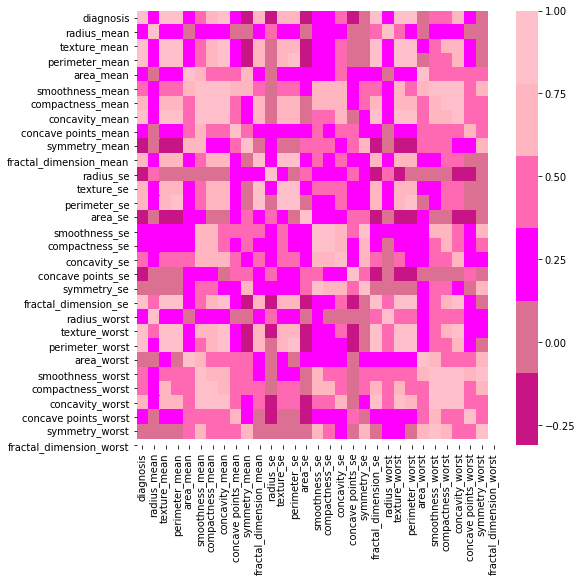

In [13]:
plt.figure(figsize=(8,8))

sns.heatmap(bc_corr, cbar = True, annot = False, yticklabels = drop_id_dataset.columns,
           cmap = ListedColormap(['#C71585', '#DB7093', '#FF00FF', '#FF69B4', '#FFB6C1', '#FFC0CB']),
           xticklabels = drop_id_dataset.columns)

plt.show()

In [14]:
high_corr = bc_corr.abs()
high_corr_unstack = high_corr.unstack() # unstacks the row to columns
high_corr_sort = high_corr_unstack.sort_values(ascending = False)

high_corr_sort[30:35] # the first 29 values will have a correlation of 1

radius_mean      perimeter_mean     0.997855
perimeter_mean   radius_mean        0.997855
radius_worst     perimeter_worst    0.993708
perimeter_worst  radius_worst       0.993708
radius_mean      area_mean          0.987357
dtype: float64

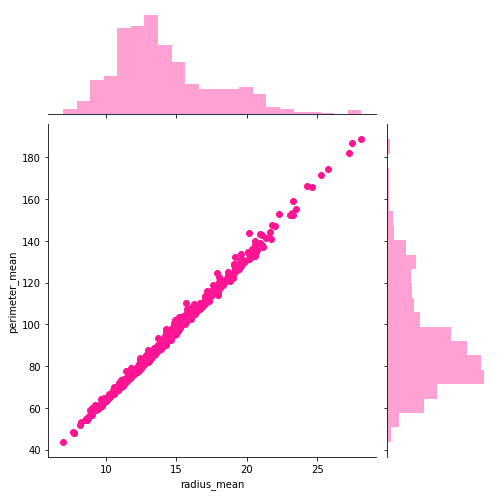

In [15]:
sns.jointplot('radius_mean', 'perimeter_mean', data = dataset, kind = "scatter", 
              space = 0.1, color="#FF1493", height = 7, ratio = 3) # plot two high-correlation variables from the dataset
plt.show()

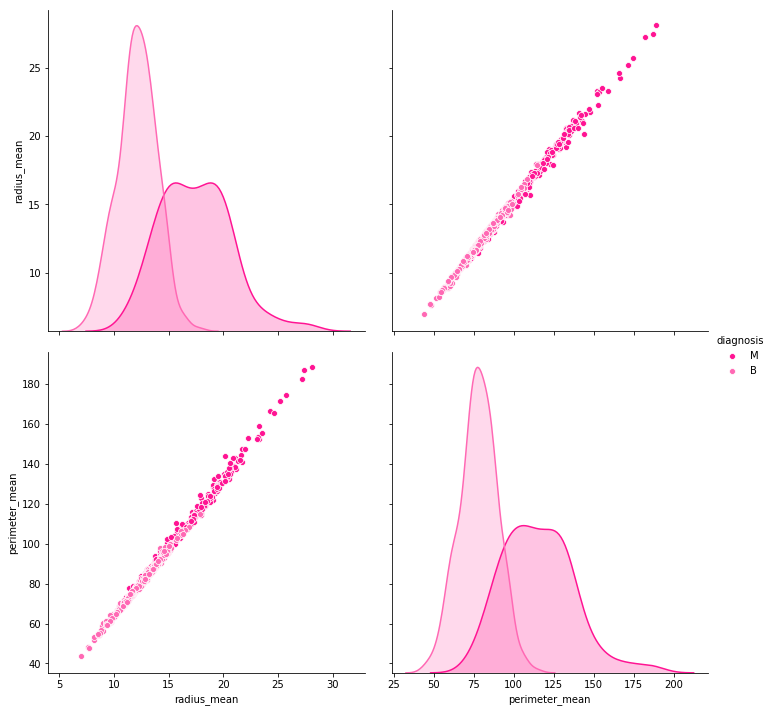

In [16]:
sns.pairplot(dataset, vars= ["radius_mean", "perimeter_mean"], palette = sns.color_palette(['#FF1493', '#FF69B4']), 
            hue = 'diagnosis', height=5) # visualize the relationship between two variables, where the variables can be continuous
plt.show()

<h1>Maching Learning</h1> <br>
To predict the diagnosis type using SVM : B/M <br>
Since this is a classification problem, I will attempt to solve it using SVM since it is an excellent classifier algorithm

### SVM

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [18]:
# Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(drop_id_dataset.loc[:, drop_id_dataset.columns != 'diagnosis'],
                                                    drop_id_dataset['diagnosis'], stratify = drop_id_dataset['diagnosis'], random_state = 2)

In [19]:
vector = SVC(gamma = 'auto')
vector.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
print("Support vector machine training set accuracy:", vector.score(X_train, y_train))
print("Support vector machine testing set accuracy:", round(vector.score(X_test, y_test),4))

Support vector machine training set accuracy: 1.0
Support vector machine testing set accuracy: 0.6294


In [21]:
# to avoid overfitting, we transform the values (scaling each feature to a given range)
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.fit_transform(X_test)

In [22]:
vector_scaled = SVC(gamma = 'auto')
vector_scaled.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
print("Support vector machine training set accuracy:", round(vector_scaled.score(X_train_scaled, y_train),4))
print("Support vector machine testing set accuracy:", round(vector_scaled.score(X_test_scaled, y_test),4))

Support vector machine training set accuracy: 0.9648
Support vector machine testing set accuracy: 0.9091


The accuracy will differ on each run because of variance in data split.

## Trying other algorithms

### Decision Trees

In [24]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
 
print(f"Decision tree training set accuracy: {format(tree.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(tree.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 1.0000 
Decision tree testing set accuracy: 0.9091 


In [25]:
# to avoid overfitting, set limit on depth of tree

tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
 
print(f"Decision tree training set accuracy: {format(tree.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(tree.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 0.9930 
Decision tree testing set accuracy: 0.9021 


In [26]:
# Feature importance

print(f"Breast Cancer Feature Importances: \n {format(tree.feature_importances_)} ")

Breast Cancer Feature Importances: 
 [0.         0.         0.         0.         0.         0.
 0.         0.74462911 0.         0.         0.         0.
 0.00995465 0.00237655 0.         0.0123812  0.         0.
 0.         0.01951347 0.         0.07327952 0.06028369 0.06754669
 0.00487629 0.         0.00515883 0.         0.         0.        ] 


In [27]:
breast_cancer_features = [x for i,x in enumerate(drop_id_dataset.columns) if i!=30]
 
def breast_cancer_feature_importances_plot(model):
    plt.figure(figsize=(20,8))
    n_features = 30
    plt.barh(range(n_features), model.feature_importances_, align='center', color=['#FF69B4'])
    plt.yticks(np.arange(n_features), breast_cancer_features)
    plt.title('Breast Cancer Decision Trees Features Importances')
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.show();

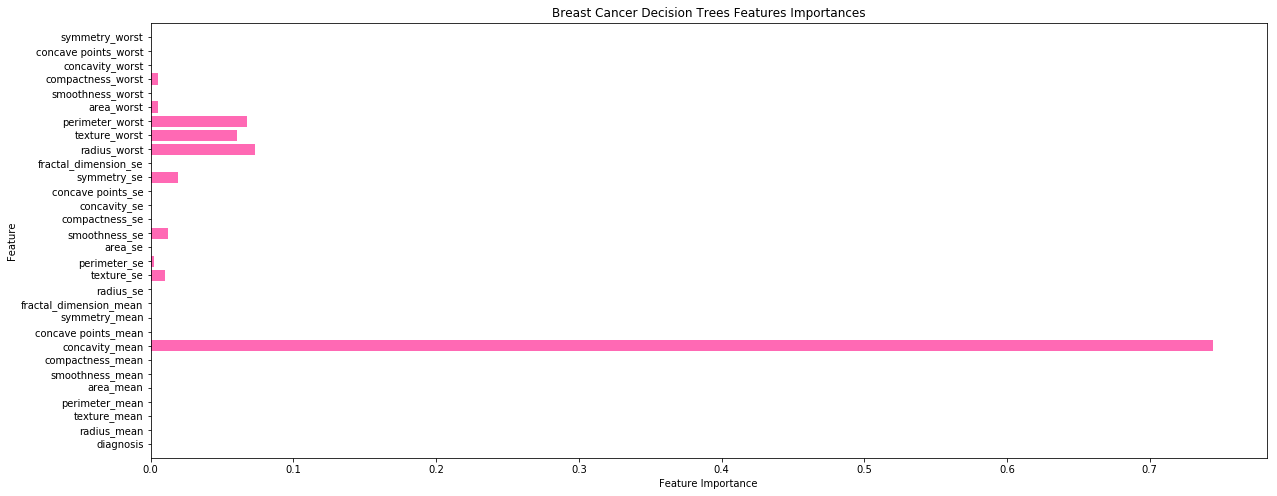

In [28]:
breast_cancer_feature_importances_plot(tree)

### Gradient Boosting

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

boosting = GradientBoostingClassifier()
boosting.fit(X_train, y_train)
 
print(f"Gradient boosting training set accuracy: {format(boosting.score(X_train, y_train), '.4f')} ")
print(f"Gradient boosting testing set accuracy: {format(boosting.score(X_test, y_test), '.4f')} ")

Gradient boosting training set accuracy: 1.0000 
Gradient boosting testing set accuracy: 0.9371 


In [30]:
# to avoid overfitting

max_boosting = GradientBoostingClassifier(max_depth=1)
max_boosting.fit(X_train, y_train)
 
print(f"Gradient boosting training set accuracy: {format(max_boosting.score(X_train, y_train), '.4f')} ")
print(f"Gradient boosting testing set accuracy: {format(max_boosting.score(X_test, y_test), '.4f')} ")

Gradient boosting training set accuracy: 0.9953 
Gradient boosting testing set accuracy: 0.9231 


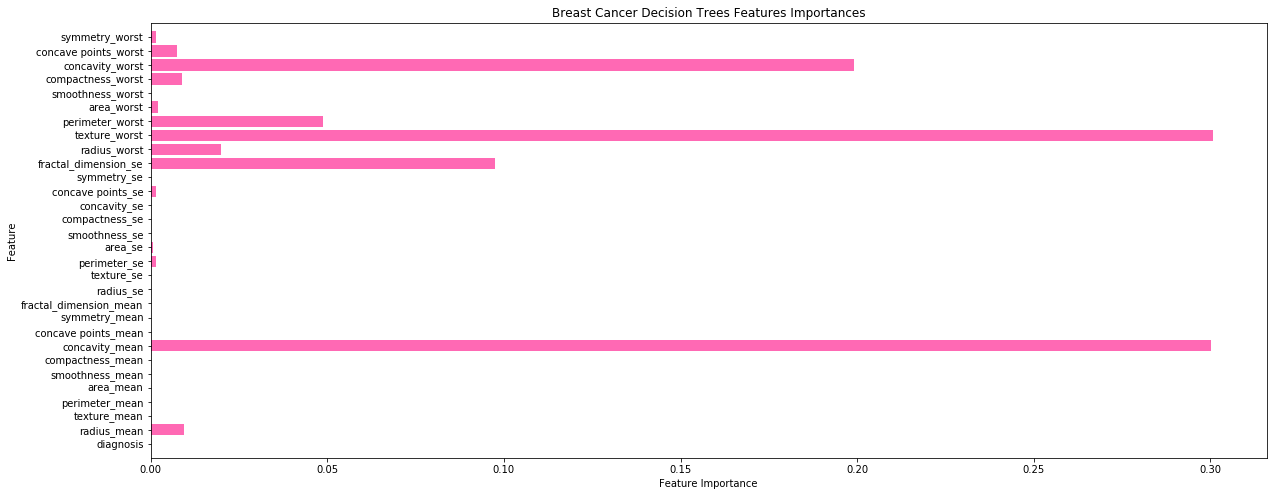

In [31]:
breast_cancer_feature_importances_plot(max_boosting)

### kNN

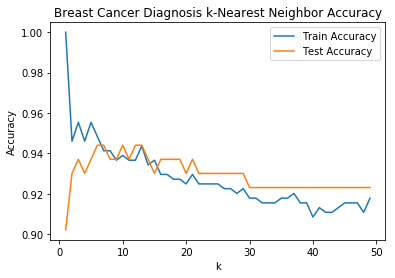

In [32]:
from sklearn.neighbors import KNeighborsClassifier

train_accuracy = []
test_accuracy = []

k = range(1, 50)
 
for n_neighbors in k:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(k, train_accuracy, label="Train Accuracy")
plt.plot(k, test_accuracy, label="Test Accuracy")
plt.title('Breast Cancer Diagnosis k-Nearest Neighbor Accuracy')
plt.ylabel("Accuracy")
plt.xlabel("k")
plt.legend()
plt.show()

In [33]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
 
print("k-Nearest Neighbor 7")
print(f"k-Nearest Neighbor classifier on training set: {format(knn.score(X_train, y_train), '.4f')} ")
print(f"k-Nearest Neighbor classifier on testing set: {format(knn.score(X_test, y_test), '.4f')} ")

k-Nearest Neighbor 7
k-Nearest Neighbor classifier on training set: 0.9413 
k-Nearest Neighbor classifier on testing set: 0.9441 


In [34]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
 
print("k-Nearest Neighbor 12")
print(f"k-Nearest Neighbor classifier on training set: {format(knn.score(X_train, y_train), '.4f')} ")
print(f"k-Nearest Neighbor classifier on testing set: {format(knn.score(X_test, y_test), '.4f')} ")

k-Nearest Neighbor 12
k-Nearest Neighbor classifier on training set: 0.9366 
k-Nearest Neighbor classifier on testing set: 0.9441 


In [35]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
 
print("k-Nearest Neighbor 10")
print(f"k-Nearest Neighbor classifier on training set: {format(knn.score(X_train, y_train), '.4f')} ")
print(f"k-Nearest Neighbor classifier on testing set: {format(knn.score(X_test, y_test), '.4f')} ")

k-Nearest Neighbor 10
k-Nearest Neighbor classifier on training set: 0.9390 
k-Nearest Neighbor classifier on testing set: 0.9441 


### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
 
print(f"Random forest training set accuracy: {format(forest.score(X_train, y_train), '.4f')} ")
print(f"Random forest testing set accuracy: {format(forest.score(X_test, y_test), '.4f')} ")

Random forest training set accuracy: 0.9977 
Random forest testing set accuracy: 0.9231 


In [37]:
# to avoid overfitting

forest = RandomForestClassifier(max_depth=5, n_estimators=100)
forest.fit(X_train, y_train)
 
print(f"Random forest training set accuracy: {format(forest.score(X_train, y_train), '.4f')} ")
print(f"Random forest testing set accuracy: {format(forest.score(X_test, y_test), '.4f')} ")

Random forest training set accuracy: 0.9953 
Random forest testing set accuracy: 0.9301 


In [38]:
# Feature Importance

print(f"Breast Cancer Feature Importances: \n {format(forest.feature_importances_)} ")

Breast Cancer Feature Importances: 
 [0.04219758 0.00916704 0.05190441 0.04127719 0.00412705 0.00872672
 0.07023466 0.1106376  0.00160039 0.00253235 0.01699397 0.00327018
 0.00833183 0.03034336 0.00218812 0.00414714 0.00664122 0.00295305
 0.00280968 0.00294036 0.08412516 0.01909363 0.15269142 0.13609428
 0.00885623 0.02509219 0.01914919 0.11110475 0.01532664 0.00544262] 


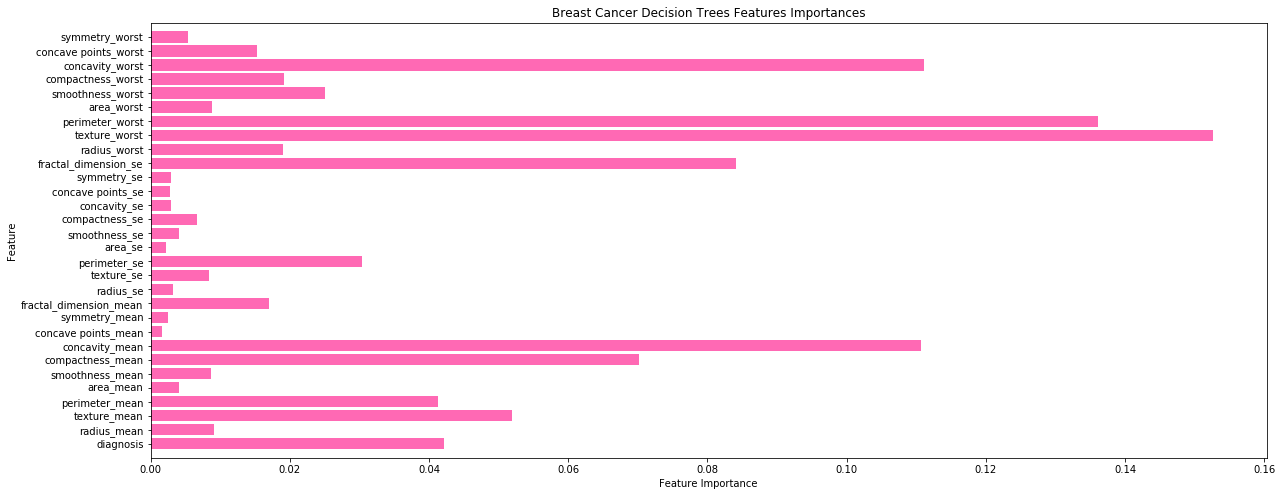

In [39]:
breast_cancer_feature_importances_plot(forest)

### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

model = LogisticRegression().fit(X_train, y_train)
 
print(f"Logistic regression training set classification score: {format(model.score(X_train, y_train), '.4f')} ")
print(f"Logistic regression testing set classification score: {format(model.score(X_test, y_test), '.4f')} ")

Logistic regression training set classification score: 0.9507 
Logistic regression testing set classification score: 0.9301 


In [41]:
# Regularization parameter
model_001 = LogisticRegression(C=0.01).fit(X_train, y_train)
 
print(f"Logistic Regression training set classification score: {format(model_001.score(X_train, y_train), '.4f')} ")
print(f"Logistic Regression testing set classification score: {format(model_001.score(X_test, y_test), '.4f')} ")

Logistic Regression training set classification score: 0.9413 
Logistic Regression testing set classification score: 0.9301 


In [42]:
model_100 = LogisticRegression(C=100).fit(X_train, y_train)
 
print(f"Logistic Regression training set classification score: {format(model_100.score(X_train, y_train), '.4f')} ")
print(f"Logistic Regression testing set classification score: {format(model_100.score(X_test, y_test), '.4f')} ")

Logistic Regression training set classification score: 0.9484 
Logistic Regression testing set classification score: 0.9301 
